# Make GWP figures

To run this notebook, the GWP notebook must first be run (for the base case, and adjust drydep to 80 and 50 Tg/y

To do:
- Fix hatching in the legend of the Hydrogen plot
- Use similar colors for ozone and methane induced ozone (and strat H2O)

In [1]:
filepath= r"./output/"

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import itertools

## Hydrogen GWP

In [3]:
tittel = 'H2 GWP'
ytittel ='GWP'

plt.rcParams.update({'font.size': 14})


In [4]:
print(filepath+'drydep_80_table_h2_gwp.csv')
df_drydep80_table_gwp = pd.read_csv(filepath+'drydep_80_table_h2_gwp.csv',index_col=0)
df_drydep50_table_gwp = pd.read_csv(filepath+'drydep_50_table_h2_gwp.csv',index_col=0)
df_table_gwp = pd.read_csv(filepath+'table_h2_gwp.csv',index_col=0)

./output/drydep_80_table_h2_gwp.csv


In [5]:
total_drydep80 = df_drydep80_table_gwp.sum()
#print(total_drydep80)
total_drydep50 = df_drydep50_table_gwp.sum()
#print(total_drydep50)


#print(df_table_gwp.index)
df_table_gwp = df_table_gwp.reindex(['CH4', 'O3', 'O3 CH4ind', 'strat H2O', 'strat H2O CH4ind'])



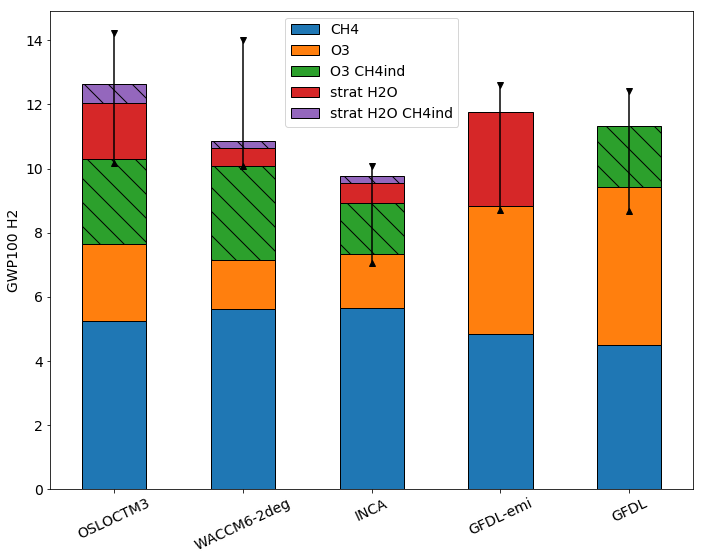

In [6]:
fig, axs = plt.subplots(nrows=1,ncols=1,squeeze=True,figsize=(10,8))
df_table_gwp.T.plot.bar(stacked=True,
                        #color={"O3": 'C1', "CH4": 'C2',"O3 CH4ind":'C1',"strat H2O":'C4',"strat H2O CH4ind":'C4'},
                        edgecolor='black',
                        ax=axs) 

for m,model in enumerate(df_table_gwp.columns):
    axs.plot(m,total_drydep80.loc[model],marker='^',color='black')
    axs.plot(m,total_drydep50.loc[model],marker='v',color='black')
    axs.plot([m,m],[total_drydep50.loc[model],total_drydep80.loc[model]],color='black')

bars = [thing for thing in axs.containers if isinstance(thing,mpl.container.BarContainer)]
i = 0
#pattern = ['','-','+','x','\\','*', 'o', 'O', '.','','-','+','x','\\','*', 'o', 'O', '.','','-','+','x','\\','*', 'o', 'O', '.']
for b,bar in enumerate(bars):    
    for p,patch in enumerate(bar):
        if b == 2 and p !=3:
        #if i > 7 and i < 10:
            patch.set_hatch('\\')
        if b == 4 and p !=3:
        #if i > 7 and i < 10:
            patch.set_hatch('\\')
        i = i + 1
       
plt.ylabel('GWP100 H2')
plt.xticks(rotation=25, horizontalalignment="center")
plt.tight_layout()

## Methane GWP

In [7]:
df_drydep80_table_gwp = pd.read_csv(filepath+'drydep_80_table_ch4_gwp.csv',index_col=0)
df_drydep50_table_gwp = pd.read_csv(filepath+'drydep_50_table_ch4_gwp.csv',index_col=0)
df_table_gwp = pd.read_csv(filepath+'table_ch4_gwp.csv',index_col=0)


total_drydep80 = df_drydep80_table_gwp.sum()
#print(total_drydep80)
total_drydep50 = df_drydep50_table_gwp.sum()
#print(total_drydep50)


#print(df_table_gwp.index)

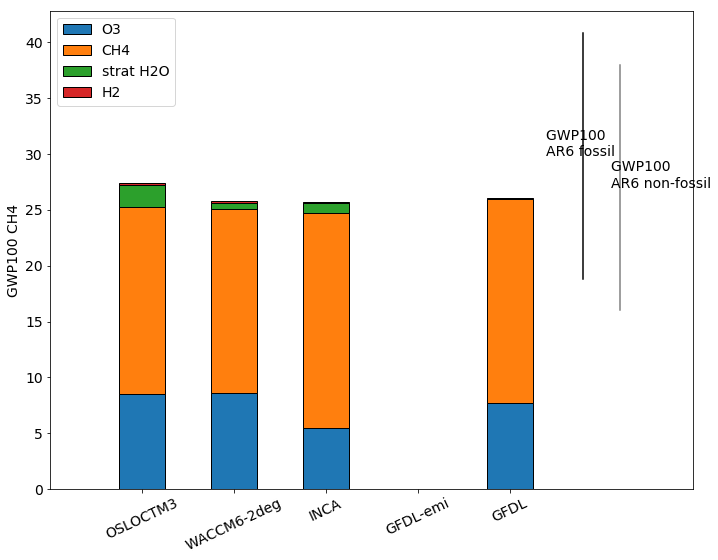

In [8]:
fig, axs = plt.subplots(nrows=1,ncols=1,squeeze=True,figsize=(10,8))
df_table_gwp.T.plot.bar(stacked=True,
                        #color={"O3": 'C1', "CH4": 'C2',"strat H2O":'C4',"H2":'C5'},
                        edgecolor='black',ax=axs) 
axs.plot([4.8,4.8],[29.8-11 ,29.8+11 ],color='black')
axs.text(4.4,29.8,'GWP100 \nAR6 fossil')
axs.plot([5.2,5.2],[27.0-11 ,27.0+11 ],color='gray')
axs.text(5.1,27.0,'GWP100 \nAR6 non-fossil')
plt.xlim([-1,6])
plt.ylabel('GWP100 CH4')
plt.xticks(rotation=25, horizontalalignment="center")
plt.tight_layout()    